# 服饰图像分类案例
作者：郑灵翔,lxzheng@xmu.edu.cn

用神经网络模型解决服饰分类问题，搭建一个模型对上衣、裤子、套头衫、连衣裙、外套、凉鞋、衬衫、运动鞋、包、短靴等10类服饰相关物品进行分类

## 导入相关库

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

## 加载Fashion Mnist数据集

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### 观察数据集

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
set(test_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

### 显示数据样例

In [4]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
from PIL import Image
for i in range(50):
    im=Image.fromarray(train_images[i])
    im.save(class_names[train_labels[i]]+'_'+str(i)+'.jpg')

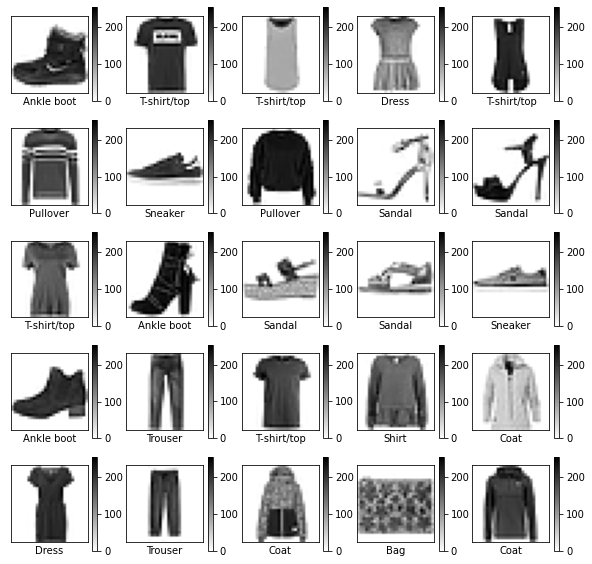

In [9]:


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.colorbar()
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### 数据预处理
对训练集和测试集统一做归一化处理

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### 显示预处理后的数据样例

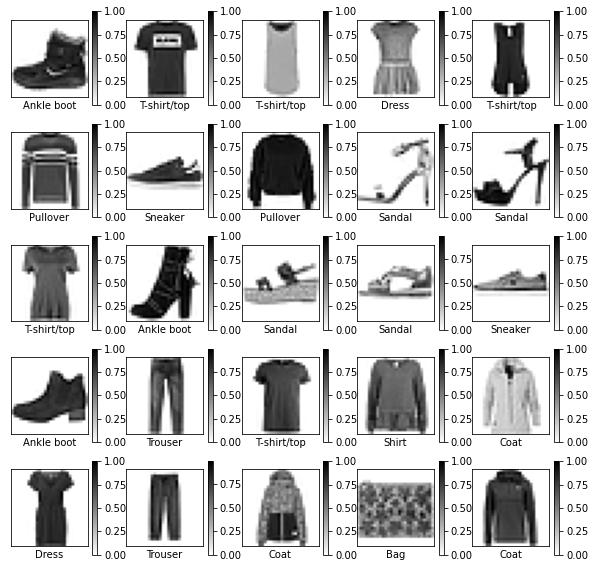

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.colorbar()
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 顺序模型1

In [12]:
model = keras.Sequential([
    keras.layers.Input(shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
],name='seq_model')

## 模型编译

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


## 模型训练
用model.fit进行模型训练，并将训练数据分割出一部分作为验证集

In [14]:
history=model.fit(train_images, train_labels, epochs=10,validation_split=0.15)

Epoch 1/10
1594/1594 [==============================] - 3s 2ms/step - loss: 0.5106 - acc: 0.8214 - val_loss: 0.4386 - val_acc: 0.8441
Epoch 2/10
1594/1594 [==============================] - 2s 2ms/step - loss: 0.3854 - acc: 0.8611 - val_loss: 0.4136 - val_acc: 0.8571
Epoch 3/10
1594/1594 [==============================] - 2s 1ms/step - loss: 0.3450 - acc: 0.8754 - val_loss: 0.3594 - val_acc: 0.8708
Epoch 4/10
1594/1594 [==============================] - 2s 1ms/step - loss: 0.3200 - acc: 0.8823 - val_loss: 0.3431 - val_acc: 0.8789
Epoch 5/10
1594/1594 [==============================] - 2s 1ms/step - loss: 0.3025 - acc: 0.8882 - val_loss: 0.3374 - val_acc: 0.8799
Epoch 6/10
1594/1594 [==============================] - 2s 1ms/step - loss: 0.2841 - acc: 0.8953 - val_loss: 0.3421 - val_acc: 0.8800
Epoch 7/10
1594/1594 [==============================] - 2s 1ms/step - loss: 0.2721 - acc: 0.9000 - val_loss: 0.3315 - val_acc: 0.8810
Epoch 8/10
1594/1594 [==============================] - 2s 1ms

## 模型训练1
与前面的训练代码相比，增加如下功能：
- 使用tensorboard观察训练指标

In [14]:
import time
log_dir="logs/fit/" +time.strftime("%Y%m%d%H%M%S", time.localtime())
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [15]:
history=model.fit(train_images, train_labels, epochs=10,
                 validation_split=0.15,
                 callbacks=[tensorboard_callback])

Epoch 1/10
1594/1594 [==============================] - 4s 2ms/step - loss: 0.5145 - acc: 0.8191 - val_loss: 0.4618 - val_acc: 0.8364
Epoch 2/10
1594/1594 [==============================] - 3s 2ms/step - loss: 0.3822 - acc: 0.8627 - val_loss: 0.3747 - val_acc: 0.8680
Epoch 3/10
1594/1594 [==============================] - 3s 2ms/step - loss: 0.3428 - acc: 0.8750 - val_loss: 0.3632 - val_acc: 0.8679
Epoch 4/10
1594/1594 [==============================] - 3s 2ms/step - loss: 0.3189 - acc: 0.8832 - val_loss: 0.3912 - val_acc: 0.8609
Epoch 5/10
1594/1594 [==============================] - 3s 2ms/step - loss: 0.2986 - acc: 0.8904 - val_loss: 0.3527 - val_acc: 0.8722
Epoch 6/10
1594/1594 [==============================] - 3s 2ms/step - loss: 0.2828 - acc: 0.8957 - val_loss: 0.3279 - val_acc: 0.8846
Epoch 7/10
1594/1594 [==============================] - 3s 2ms/step - loss: 0.2687 - acc: 0.9017 - val_loss: 0.3133 - val_acc: 0.8863
Epoch 8/10
1594/1594 [==============================] - 3s 2ms

##  Tensorboard
在notebook中使用tensorboard需要先用load_ext，调用tensorboard扩展

In [27]:
%load_ext tensorboard

In [28]:
%tensorboard --host=0.0.0.0 --port=6006 --logdir logs/fit

## 训练历史可视化
Keras Model 上的 fit() 方法返回一个 History 对象。History.history 属性是一个记录了连续迭代的训练/验证损失值和评估值的字典。

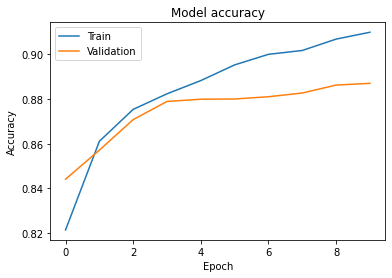

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

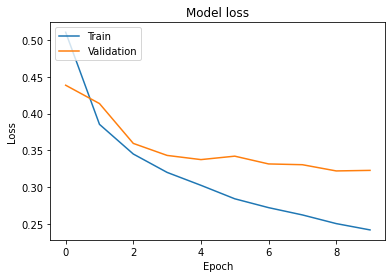

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## 模型评估

In [17]:
test = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 0.3418 - acc: 0.8793


### 保存模型

In [18]:
model.save("my_model.h5")

### 加载模型

In [19]:
new_model = keras.models.load_model('my_model.h5')

In [20]:
new_model.summary()

Model: "seq_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.summary()

Model: "seq_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## 使用模型

### 加载测试图像

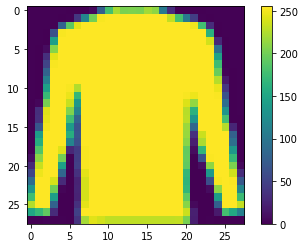

In [22]:
from PIL import Image
input_image = Image.open("test3.jpg")
input_image = input_image.resize((28, 28))
img = np.array(input_image)
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

### 对测试图像进行预处理

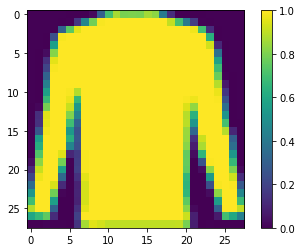

In [23]:
img=img/255.0
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

In [24]:
print('img shape:'+str(img.shape))
img=np.expand_dims(img, axis=0) 
print('img shape after expand_dims:'+str(img.shape))

img shape:(28, 28)
img shape after expand_dims:(1, 28, 28)


### 用模型进行图像分类预测推理

In [25]:
predict_result=new_model.predict(img)
print(predict_result)

[[1.2319101e-01 6.8164199e-09 8.7214625e-01 2.6916639e-06 6.2721178e-05
  7.7106161e-14 4.5963894e-03 1.1392179e-10 9.4677972e-07 1.3368475e-08]]


### 显示推理结果

In [26]:
class_names[np.argmax(predict_result)]

'Pullover'

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="知识共享许可协议" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />本作品采用<a rel="license" href="http://creativecommons.org/licenses/by/4.0/">知识共享署名 4.0 国际许可协议</a>进行许可。